## Movie Dataset Exploration 
- Movies listed in the Full MovieLens Dataset.Metadata on over 45,000 movies. 
- The dataset consists of movies released on or before July 2017.
- Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies,    countries, TMDB vote counts and vote averages. 
- Dataset contain 26 million ratings from over 270,000 users. 
- Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

In [2]:
data_path ='C:/Users/Nimish/Documents/ML Projects/Movie Recommendation - Kaggle/Data'
csv_files = os.listdir(data_path)
csv_files

['credits.csv',
 'keywords.csv',
 'links.csv',
 'movies_metadata.csv',
 'ratings.csv',
 'ratings_small.csv']

In [3]:
# Import CSV files and store them in DataFrames
dataframes = []
for file in csv_files:
    file_path = os.path.join(data_path, file)
    df_name = file[:-4]  # Remove '.csv' from the file name
    #dfs[df_name] = pd.read_csv(file_path)
    globals()[f"{df_name}_df"] = pd.read_csv(file_path)
    dataframes.append((df_name, df))

# Print column names and data types for each DataFrame
for df_name in csv_files:
    df = globals()[f"{df_name[:-4]}_df"]
    print(f"DataFrame: {df_name[:-4]}")
    print(f"    Dimensions: {df.shape}")
    for column, dtype in zip(df.columns, df.dtypes):
        print(f"Column: {column}, Type: {dtype}")
    print(df.isnull().sum())
    print()

NameError: name 'df' is not defined

In [33]:
print(credits_df.head(5),'\n\n', keywords_df.head(5))

                                                cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew     id  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602  
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357  
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862   

       id                                           keywords
0    862  [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...
1   8844  [{'id': 10090, 'name': 'board game'}, {'id': 1...
2  15602  [{'id': 1495, 'name': 'fishing'}, {'id': 12392...
3  31357  [{'id': 818, 'name': 'based on novel'}

## Exploration
Demographic Filtering: Vote Count, Vote Average, popularity

In [38]:
movies_metadata_df['popularity'] = pd.to_numeric(movies_metadata_df['popularity'], errors='coerce')
movies_metadata_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


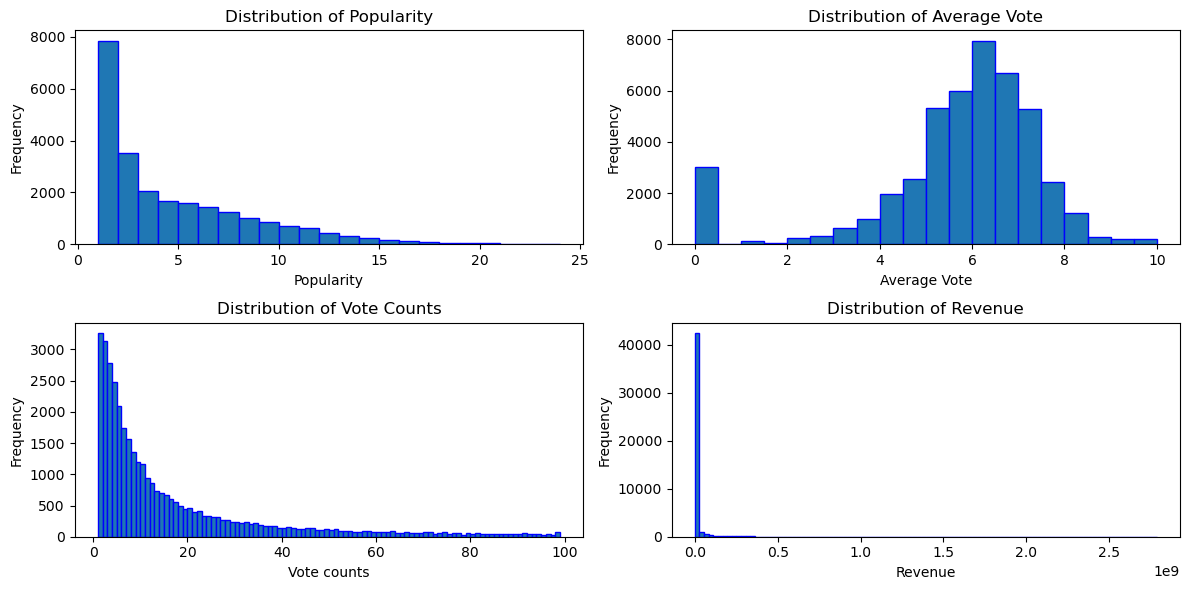

In [80]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.hist(movies_metadata_df['popularity'], bins=range(1, min(25, max(movies_metadata_df['popularity']) + 1)), edgecolor='blue')
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(movies_metadata_df['vote_average'], bins=20, edgecolor='blue')
plt.title('Distribution of Average Vote')
plt.xlabel('Average Vote')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(movies_metadata_df['vote_count'], bins=range(1,100), edgecolor='blue')
plt.title('Distribution of Vote Counts')
plt.xlabel('Vote counts')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(movies_metadata_df['revenue'], bins=100, edgecolor='blue')
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

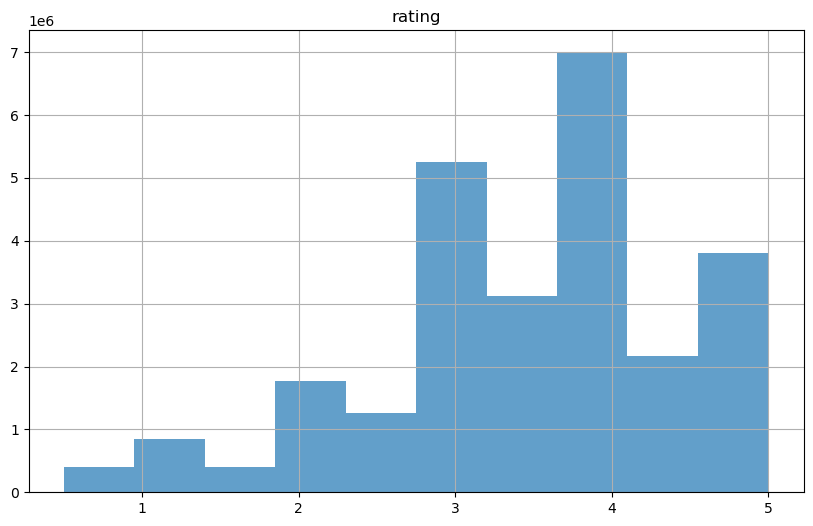

In [36]:
ratings_df[['rating']].hist(figsize=(10, 6), bins=10, alpha=0.7)
plt.show()

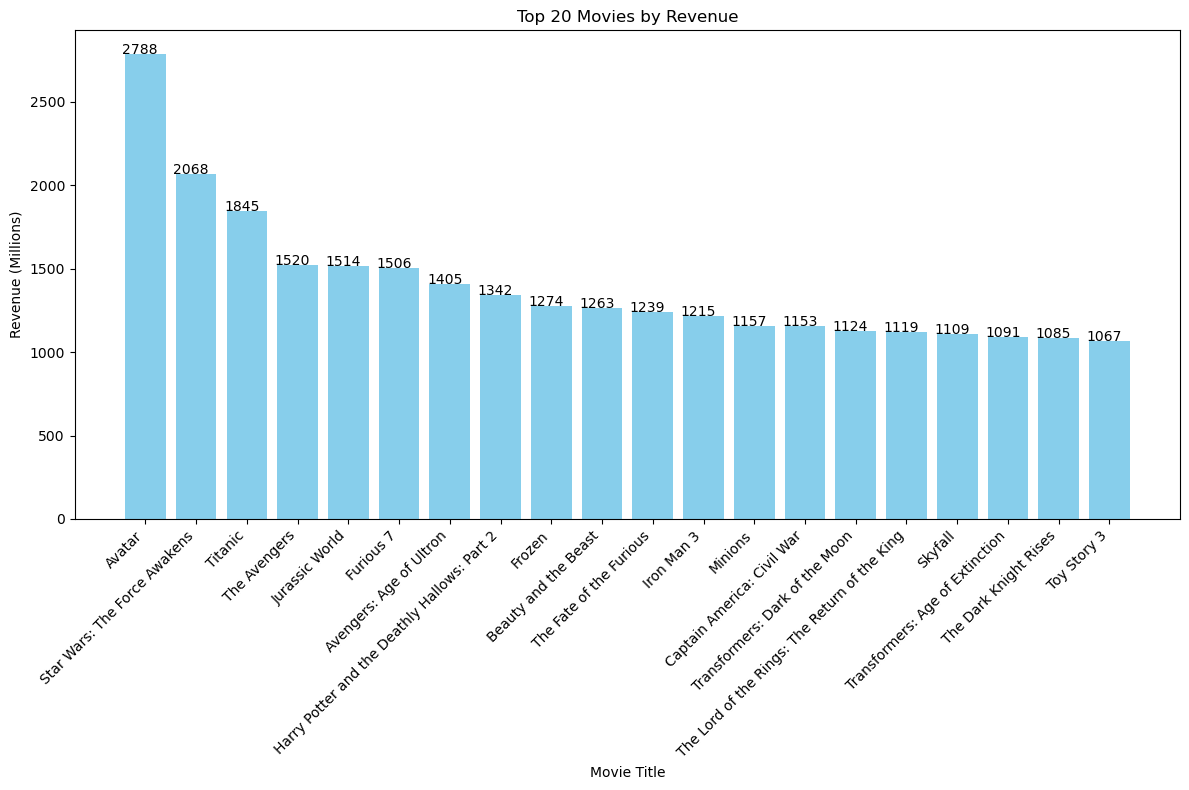

In [79]:
# Top 25 Movies by revenue
# Convert 'revenue' column to numeric (if it's not already)
movies_metadata_df['revenue'] = pd.to_numeric(movies_metadata_df['revenue'], errors='coerce')

# Sort DataFrame by 'revenue' in descending order and select top 20
top_movies = movies_metadata_df.sort_values(by='revenue', ascending=False).head(20)
top_movies['revenue'] = top_movies['revenue'] / 1000000

# Create a bar plot
plt.figure(figsize=(12, 8))
bars = plt.bar(top_movies['title'], top_movies['revenue'], color='skyblue')
plt.xlabel('Movie Title')
plt.ylabel('Revenue (Millions)')
plt.title('Top 20 Movies by Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add data labels (annotations) for each bar
for bar, value in zip(bars, top_movies['revenue']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.05, f'{value:.0f}', ha='center', color='black')
    
plt.tight_layout()
plt.show()

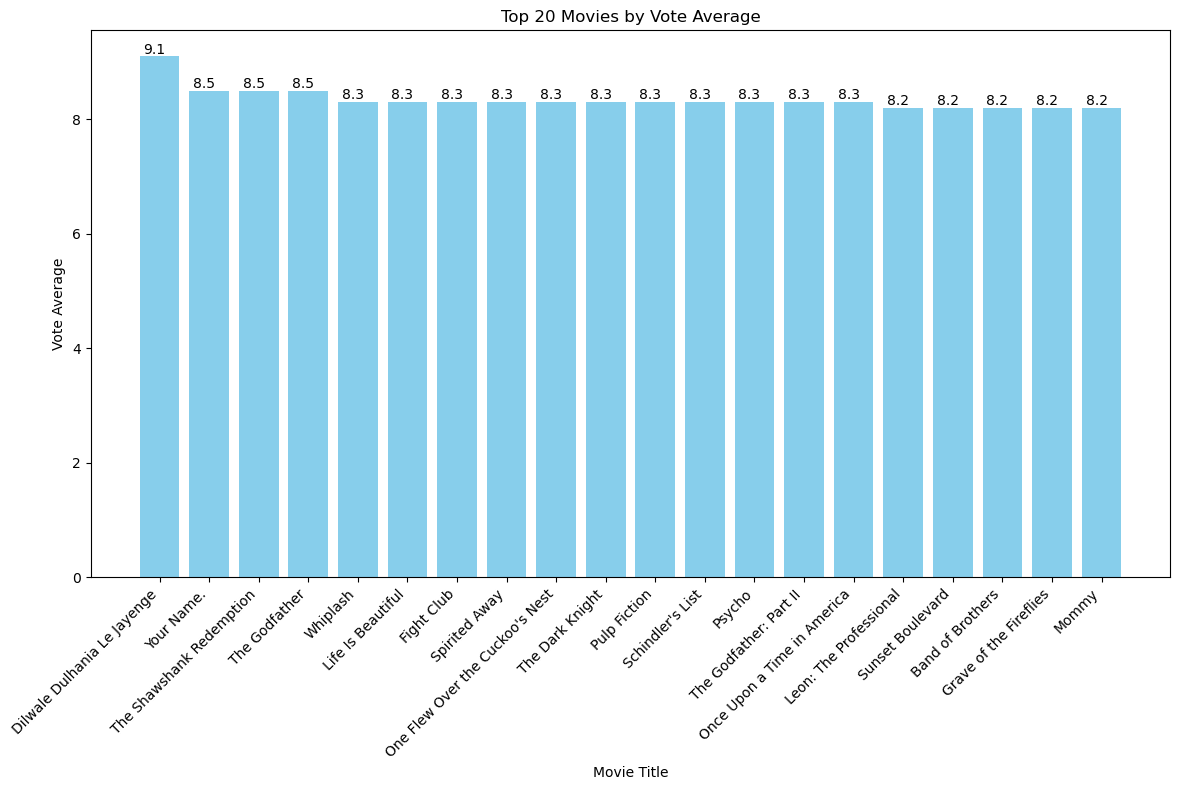

In [82]:
filtered_movies = movies_metadata_df[movies_metadata_df['vote_count'] > 500]

# Sort DataFrame by 'vote_average' in descending order and select top 20
top_movies = filtered_movies.sort_values(by='vote_average', ascending=False).head(20)

# Create a bar plot
plt.figure(figsize=(12, 8))
bars = plt.bar(top_movies['title'], top_movies['vote_average'], color='skyblue')
plt.xlabel('Movie Title')
plt.ylabel('Vote Average')
plt.title('Top 20 Movies by Vote Average')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add data labels (annotations) for each bar
for bar, value in zip(bars, top_movies['vote_average']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.05, f'{value:.1f}', ha='center', color='black')
plt.tight_layout()
plt.show()

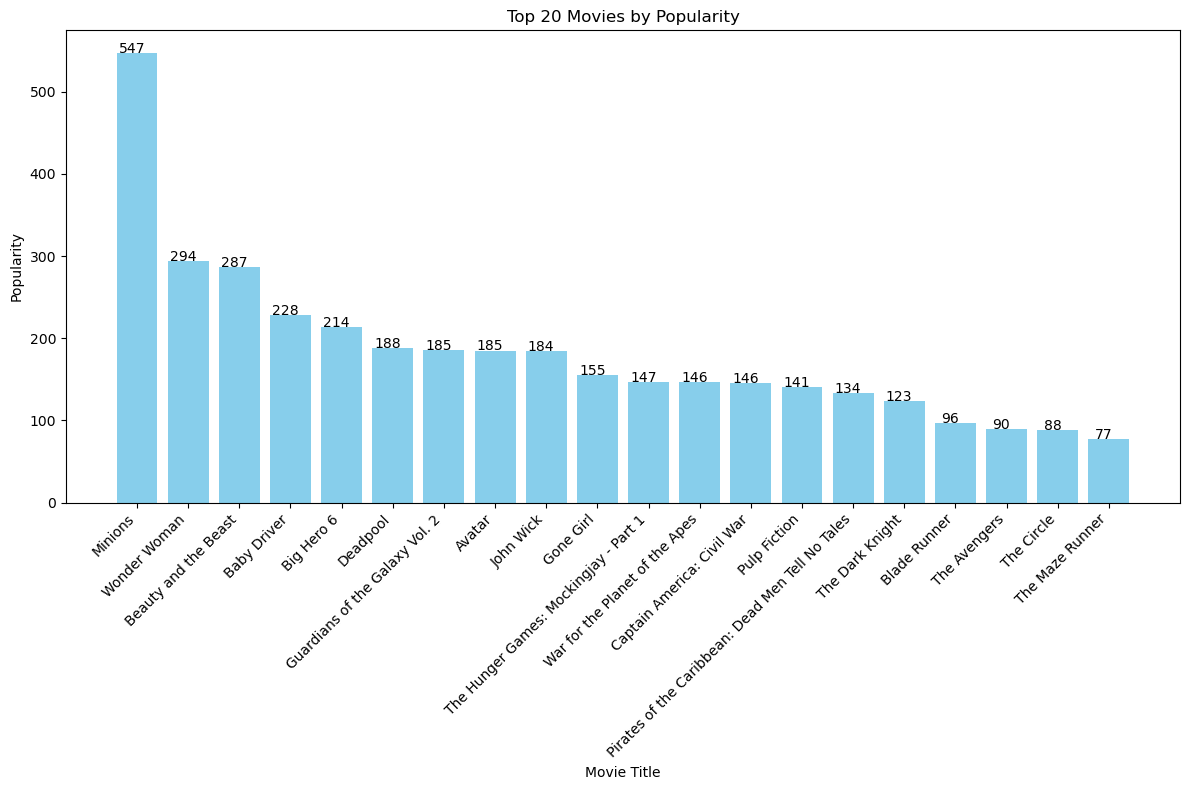

In [81]:
movies_metadata_df['popularity'] = pd.to_numeric(movies_metadata_df['popularity'], errors='coerce')

filtered_movies = movies_metadata_df[movies_metadata_df['vote_count'] > 500]

# Sort DataFrame by 'vote_average' in descending order and select top 20
top_movies = filtered_movies.sort_values(by='popularity', ascending=False).head(20)

# Create a bar plot
plt.figure(figsize=(12, 8))
bars = plt.bar(top_movies['title'], top_movies['popularity'], color='skyblue')
plt.xlabel('Movie Title')
plt.ylabel('Popularity')
plt.title('Top 20 Movies by Popularity')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add data labels (annotations) for each bar
for bar, value in zip(bars, top_movies['popularity']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.05, f'{value:.0f}', ha='center', color='black')
plt.tight_layout()
plt.show()